<a href="https://colab.research.google.com/github/alizul01/2141720088-PCVK-2023/blob/main/Jobsheet_5_Gamma_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsweet 5 - Computer Vision

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from google.colab.patches import cv2_imshow

## Method Area

In [113]:
def gamma(image, gamma):
  power = 1 / gamma
  res = [((i/255) ** power) * 255 for i in range(256)]
  res = np.array(res, np.uint8)
  return cv2.LUT(image, res)


def bit_depth(image, depth):
    level = 255 / (pow(2, depth) - 1)
    return level

def calculate_psnr(img, value):
    mse = np.mean((img - value) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def denoise_and_display(counter, image_path):
    print(f'Average Denoising {counter} citra')
    print('------------------------')

    ori = cv2.imread(image_path)
    denoise = np.zeros(ori.shape, ori.dtype)

    denoising_avg = np.mean(cv_img[:counter], axis=0).astype(np.uint8)

    value = calculate_psnr(ori, denoising_avg)
    print(f"Nilai PSNR: {value} dB")

    final_frame = cv2.hconcat((ori, denoising_avg))
    cv2_imshow(denoising_avg)

def apply_bitwise_operation(image, mask_center, mask_radius, operation):
    mask = np.zeros(image.shape, dtype=np.uint8)
    mask = cv2.circle(mask, radius=mask_radius, color=(255, 255, 255), thickness=-1, center=mask_center)

    if operation == 'and':
        result = cv2.bitwise_and(image, mask)
    elif operation == 'or':
        result = cv2.bitwise_or(image, mask)
    elif operation == 'not':
        result = cv2.bitwise_not(cv2.bitwise_and(image, mask))
    elif operation == 'xor':
        result = cv2.bitwise_xor(image, mask)
    else:
        raise ValueError("Invalid operation")

    return result

## Mencoba menampilkan data galaxy terlebih dahulu

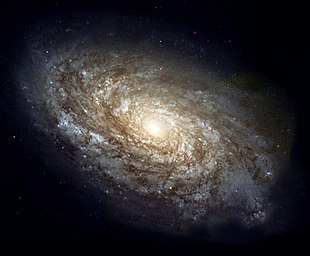

In [70]:
img_galaxy = cv2.imread('./galaxy.jpg')
cv2_imshow(img_galaxy)

## Apply Gamma

In [71]:
try:
  value = float(input("Masukkan gamma: "))
except ValueError:
  print("Value salah bosq")

Masukkan gamma: 2


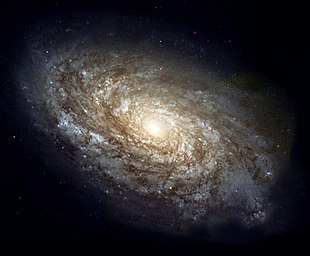

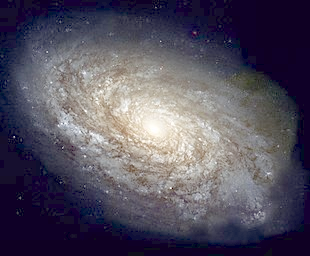

In [72]:
gamma_img_galaxy = gamma(img_galaxy, value)
cv2_imshow(img_galaxy)
cv2_imshow(gamma_img_galaxy)

## Bit Depth Area

In [73]:
try:
  value = float(input("Masukkan bit depth: "))
except ValueError:
  print("Value salah bosq")

Masukkan bit depth: 9


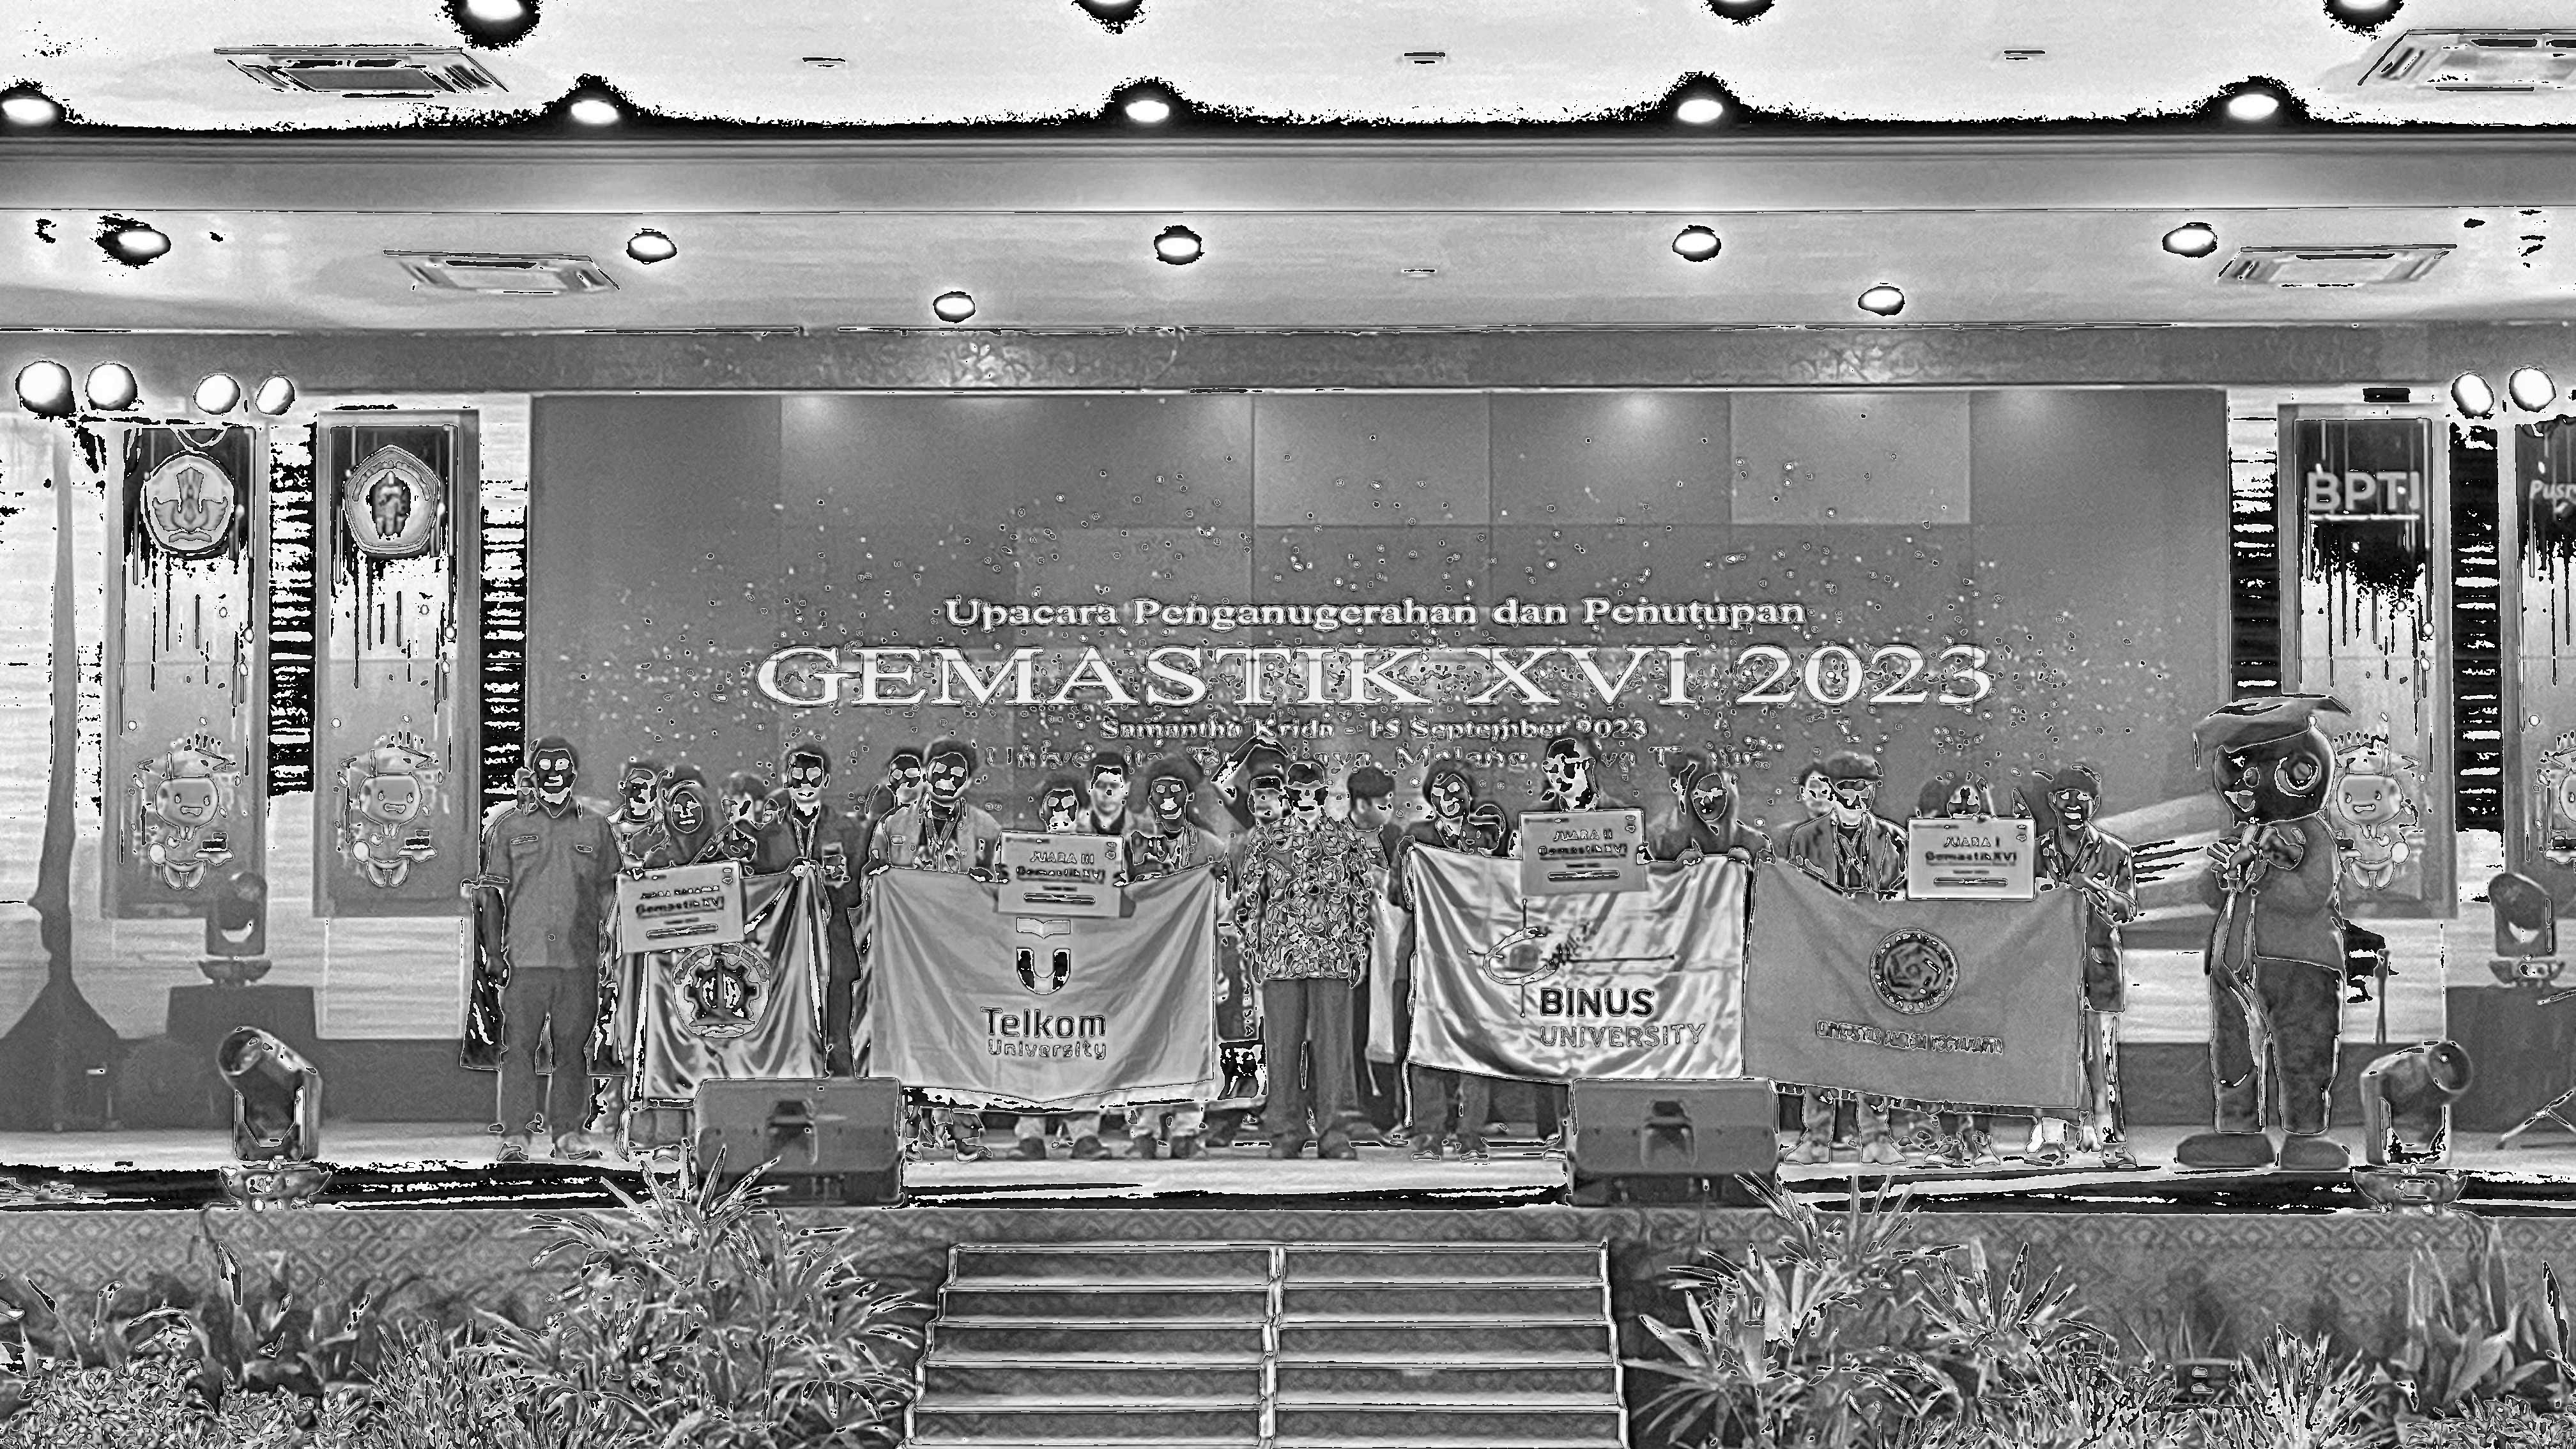

In [75]:
image = cv2.imread('./Dokumentasi 1.jpeg', cv2.IMREAD_GRAYSCALE)

level = bit_depth(image, value)
image_converted = (image / level).astype(np.uint8)

cv2_imshow(image_converted)

Image imported, sample : 


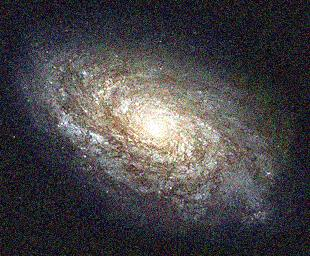

In [79]:
cv_img = []
for img in glob.glob('./drive/MyDrive/noises/*.jpg'):
  n = cv2.imread(img)
  cv_img.append(n)
print("Image imported, sample : ")

cv2_imshow(cv_img[2])

Average Denoising 5 citra
------------------------
Nilai PSNR: 27.52687832492893 dB


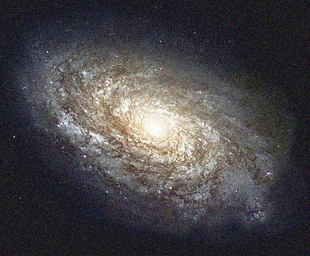

Average Denoising 10 citra
------------------------
Nilai PSNR: 27.55420023366229 dB


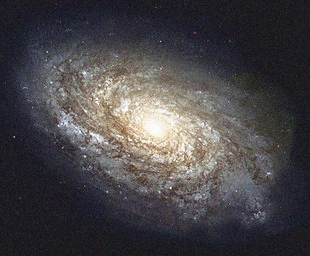

Average Denoising 20 citra
------------------------
Nilai PSNR: 27.52165373637527 dB


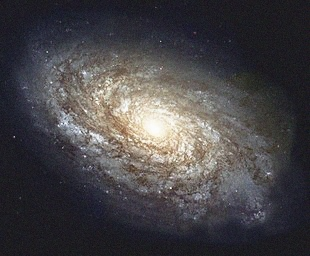

Average Denoising 40 citra
------------------------
Nilai PSNR: 27.44897648526511 dB


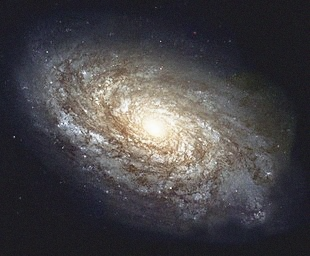

Average Denoising 80 citra
------------------------
Nilai PSNR: 27.409531205343196 dB


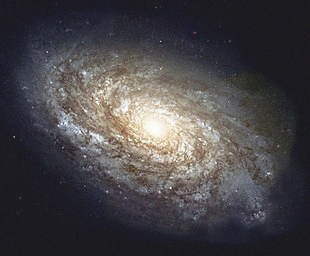

Average Denoising 100 citra
------------------------
Nilai PSNR: 27.370931279516654 dB


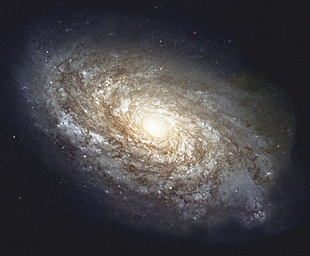

In [86]:
counter_values = [5, 10, 20, 40, 80, 100]
image_path = './galaxy.jpg'

for counter in counter_values:
    denoise_and_display(counter, image_path)

## Masking

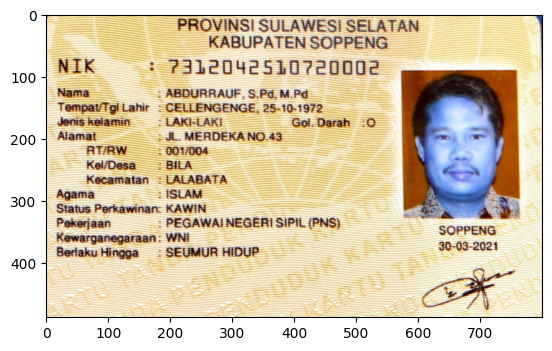

In [108]:
img_ktp_original = cv2.imread('ktp.jpeg')
plt.imshow(img_ktp_original)

## AND

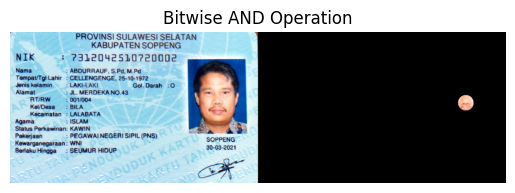

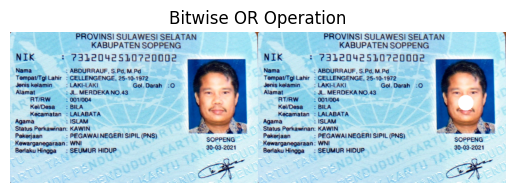

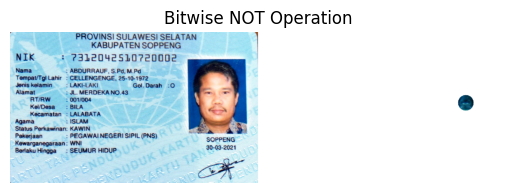

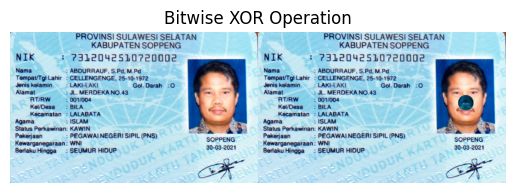

In [114]:
img_ktp_original = cv2.imread('ktp.jpeg')

mask_center = (670, 230)
mask_radius = 25

operations = ['and', 'or', 'not', 'xor']

for operation in operations:
    result = apply_bitwise_operation(img_ktp_original, mask_center, mask_radius, operation)

    final_frame = cv2.hconcat((img_ktp_original, result))
    plt.imshow(cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Bitwise {operation.upper()} Operation')
    plt.axis('off')
    plt.show()